#  描述统计

## 一, 数理统计介绍

数理统计以概率论为基础, 研究大量随机现象的统计规律性. 分为 **描述统计** 和 **推断统计** , 在数据分析领域具有非常重要的地位

## 二, 描述统计

描述统计, 就是从总体数据中提取变量的主要信息(总和, 均值, 最大, 最多等), 从而从总体层面上, 对数据进行统计性描述.
通常配合绘制相关统计图进行辅助

### 2.01, 统计学的变量类型

统计学中的变量指研究对象的特征(属性), 每个变量都有变量值和类型, 类型可分为:

**类别变量** : 对研究对象定性, 分类

类别变量又可分为:

  * 有序类别变量: 描述对象等级或顺序等, 例如, 优良中差
  * 无序类别变量: 仅做分类, 例如 A, B 血型, 男女

**数值变量** : 对研究对象定量描述

数值变量又可分为:

  * 离散变量: 取值只能用自然数或整数个单位计算, 例如统计人数
  * 连续变量: 在一定区间内可以任意取值, 例如计算身高

数值变量对加, 减, 求平均等操作有意义, 而类别变量无意义

### 2.02, 统计量

描述统计所提取的统计信息, 称为统计量, 主要包括:

  * 类别分析: 频数, 频率
  * 集中趋势分析: 均值, 中位数, 众数, 分位数
  * 离散程度分析: 极差, 方差, 标准差
  * 描述分布形状: 偏度, 峰度

准备数据:

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  

plt.rcParams['font.family'] = 'SimHei'  
plt.rcParams['axes.unicode_minus'] = False  

# 正态分布  
data1 = np.around(np.random.normal(10, 3, 600)).reshape(-1, 1)  

# 左偏  
t1 = np.random.randint(1, 21, size=100)  
t2 = np.random.randint(21, 31, size=500)  
left_data = np.concatenate([t1, t2]).reshape(-1, 1)  

# 右偏  
t3 = np.random.randint(1, 11, size=500)  
t4 = np.random.randint(11, 21, size=100)  
right_data = np.concatenate([t3, t4]).reshape(-1, 1)  

# 类别  
type_data = np.random.randint(0, 2, size=600).reshape(-1, 1)  

data = np.concatenate([data1, left_data, right_data, type_data], axis=1)  
data = pd.DataFrame(data,  
                   columns=['data1', 'left_data', 'right_data', 'type_data'])  
# 随机取 10 条数据  
data.sample(10)  


,data1,left_data,right_data,type_data
202,13.0,27.0,8.0,0.0
595,12.0,23.0,15.0,0.0
523,11.0,21.0,20.0,1.0
259,12.0,29.0,8.0,0.0
498,12.0,24.0,3.0,0.0
110,8.0,27.0,1.0,0.0
65,7.0,12.0,5.0,0.0
231,13.0,25.0,2.0,0.0
321,8.0,30.0,3.0,0.0
544,5.0,29.0,19.0,1.0


#### a, 频数

数据中某个类别出现的次数称为该类别的频数

例如, 计算上述两个类别(`0.0` 和 `1.0`)出现的频数:

In [2]:
frequency = data['type_data'].value_counts()  
frequency 

0.0    309
1.0    291
Name: type_data, dtype: int64

#### b, 频率

数据中某个类别出现次数与总次数的比值称为该类别的频率

例如, 计算上述两个类别(`0.0` 和 `1.0`)出现的频率:

In [3]:
percentage = frequency * 100 / len(data)  
percentage  

0.0    51.5
1.0    48.5
Name: type_data, dtype: float64

#### c, 均值

平均值, 一组数据的总和除以数据的个数

#### d, 中位数

将一组数据按顺序排列, 位于最中间位置的值, 即是中位数, 如果数据个数为偶数, 取中间两个的平均值

#### e, 众数

一组数据中出现次数最多的值

通常三者的关系如下图所示:

![](/images/mathematical-statistics/fenbu.png)

**注意点** :  
数值变量通常使用均值和中值表示集中趋势, 类别变量则通常使用众数  
正态分布下, 数据量足够多, 三者相同  
均值使用所有数据计算, 容易受极端值影响, 中位数和众数则不会  
众数在一组数据中可能不唯一

例, 计算字段 `data1` 的均值, 中位数和众数:

In [4]:
mean = data['data1'].mean()  
median = data['data1'].median()  
mode = data['data1'].mode()  
print(f'均值:{mean} 中位数:{median}\n众数:\n{mode}')  

均值:10.121666666666666 中位数:10.0
众数:
0    9.0
dtype: float64


#### f, 分位数

通过 n - 1 个分位, 将升序排列的数据分为 n 个区间, 使得每个区间数值个数相等(或近似相等), 则每个分位对应的数, 就是该 n 分位的分位数.
常用的有四分位数和百分位数

以四分位数为例:  
第一个分位称为 1/4 分位(下四分位), 第二个称为 2/4 分位(中四分位), 第三个称为 3/4 分位(上四分位), 其中中四分位数, 其实就是中位数

求四分位的值:

* 首先计算各个分位的位置  
index1 = (n - 1) * 0.25  
index2 = (n - 1) * 0.5  
index3 = (n - 1) * 0.75  
(index 从 0 开始, n 为元素的个数)

* 根据位置计算各个分位的值  
index 为整数, 值就是相应的 index 对应的元素  
index 不为整数, 四分位位置介于 ceil(index) 和 floor(index) 之间, 加权计算分位值

例, 求 x 的四分位数:  
**index 为整数**

In [5]:
x = np.arange(0, 9)  
n = len(x)  

index1 = (n - 1) * 0.25  
index2 = (n - 1) * 0.5    
index3 = (n - 1) * 0.75    

index = np.array([index1, index2, index3]).astype(np.int32)  
x[index]  

array([2, 4, 6])

**index 不是整数**

In [6]:
x = np.arange(0, 10)  
n = len(x)  

index1 = (n - 1) * 0.25  
index2 = (n - 1) * 0.5    
index3 = (n - 1) * 0.75    

index = np.array([index1, index2, index3])  
left = np.floor(index).astype(np.int32)  
right = np.ceil(index).astype(np.int32)  
weight, _ = np.modf(index) # 获取 index 整数和小数部分  

result = x[left] * (1 - weight) + x[right] * weight  
result  

array([2.25, 4.5 , 6.75])

Numpy 中计算分位数可直接用方法 `np.quantile` 和 `np.percentile`

In [7]:
np.quantile(x, q=[0.25, 0.5, 0.75]), np.percentile(x, q=[25, 50, 75])  

(array([2.25, 4.5 , 6.75]), array([2.25, 4.5 , 6.75]))

Pandas 中计算分位数可利用 `describe` (默认 4 分位)

In [8]:
s = pd.Series(x)  
s.describe()  

count    10.00000
mean      4.50000
std       3.02765
min       0.00000
25%       2.25000
50%       4.50000
75%       6.75000
max       9.00000
dtype: float64

In [9]:
s.describe().iloc[4:7]  

25%    2.25
50%    4.50
75%    6.75
dtype: float64

可自定义分位:

In [10]:
s.describe(percentiles=[0.15, 0.4, 0.8])  

count    10.00000
mean      4.50000
std       3.02765
min       0.00000
15%       1.35000
40%       3.60000
50%       4.50000
80%       7.20000
max       9.00000
dtype: float64

#### g, 极差

一组数据中, 最大值与最小值之差

#### h, 方差

方差体现一组数据中, 每个元素与均值的偏离程度

$$\sigma^{2}=\frac{1}{n-1} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}$$

$x_{i}:$ 数组中的每个元素  
$n:$ 数组元素的个数  
$\bar{x}:$ 数组中所有元素的均值

#### i, 标准差

标准差为方差的开方. 方差和标准差可以体现数据的分散性, 越大越分散, 越小越集中. 也可体现数据波动性(稳定性), 越大波动越大, 反之亦然

当数据足够多时, 可用 n 代替 n - 1

例, 计算 `left_data` 字段的极差, 方差, 标准差:

In [11]:
sub = np.ptp(data['left_data'])  
var = data['left_data'].var()  
std = data['left_data'].std()  
sub, var, std  

(29.0, 44.631048970506306, 6.680647346665315)

绘图对比 `data1` 和 `left_data` 的分散程度

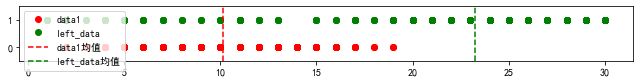

In [12]:
plt.figure(figsize=(11, 1))  
plt.ylim(-0.5, 1.5)  
plt.plot(data['data1'], np.zeros(len(data)), ls='', marker='o', color='r', label='data1')  
plt.plot(data['left_data'], np.ones(len(data)), ls='', marker='o', color='g', label='left_data')  
plt.axvline(data['data1'].mean(), ls='--', color='r', label='data1均值')  
plt.axvline(data['left_data'].mean(), ls='--', color='g', label='left_data均值')  
plt.legend()  
plt.show()  

#### j, 偏度

统计数据分布偏斜方向和程度的度量, 统计数据分布非对称程度的数字特征, 偏度为 0 , 对称分布, 小于 0, 左偏分别, 大于 0, 右偏分布

#### k, 峰度

表征概率密度分布曲线在平均值处峰值高低的特征数. 直观看来, 峰度反映了峰部的尖度, 峰度高意味着标准差增大是由低频度的大于或小于平均值的极端差值引起的.
在相同的标准差下，峰度越大，分布就有更多的极端值，那么其余值必然要更加集中在众数周围，其分布必然就更加陡峭

样本的峰度是和正态分布相比较而言的统计量, 符合正态分布的峰度为 0

例, 计算 `data` 中前三个字段的偏度, 峰度与标准差, 并绘图比较:

In [13]:
print('偏度:', data['data1'].skew(), data['left_data'].skew(), data['right_data'].skew())  
print('峰度:', data['data1'].kurt(), data['left_data'].kurt(), data['right_data'].kurt())  
print('标准差:', data['data1'].std(), data['left_data'].std(), data['right_data'].std())  

偏度: 0.0013827051273872734 -1.704193031847586 0.9122511031664028
峰度: 0.01807838530280126 2.5013831586663304 0.29539776195275813
标准差: 2.891504548352662 6.680647346665315 4.672046842962734


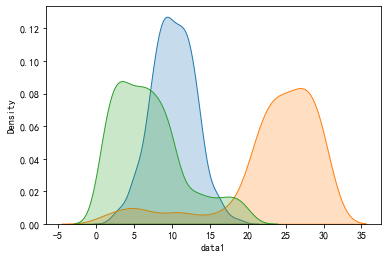

In [14]:
sns.kdeplot(data['data1'], shade=True, label='正态')  
sns.kdeplot(data['left_data'], shade=True, label='左偏')  
sns.kdeplot(data['right_data'], shade=True, label='右偏')  
plt.show()  